## **What is Linear Regression?**

Statistical method that helps estimate the strength and direction of the relationship between two (or more) variables.

**Simple Linear Regression :**

It a single feature (one independent variable) to model a linear relationship with a target (one dependent variable) by fitting the best straight line to describe the relationship.

**Multiple Linear Regression**

It more than one feature to predict a target variable by fitting the best linear relationship.



**In linear regression, your primary objective is to optimize your predictor variables (independent variables) in hopes of predicting your target variable as accurately as possible.**

## **What is Linear Regression used for?**

Regression analysis is a strong tool and has many use cases such as the following:

1. Identify the strength of the effect that the independent variable(s) have a on a dependent variable
2. Forecast effects or impacts of changes
3. Predicts trends and future values

### **Linear Regression Key Components**

**Straight Line Equation:**  y = mx + b

**Dependent Variable (y):**
variable that is being estimated and predicted, also known as target

**Independent Variable (x):** 

input variable, also known as predictors or features

**Coefficient:** 

is a numerical constant, also known as parameter

**Slope (m) :** 

determines the angle of the line

**Intercept (b):** 

constant determining the value of y when x is 0


**The challenge for regression analysis is to fit a line, out of an infinite number of lines that best describe the data.**

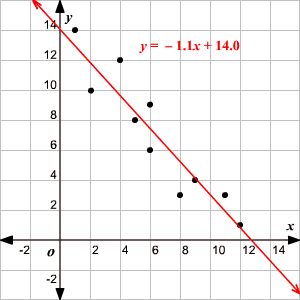



1. For this example to the right, the intercept (b) starts at 14.0.
2. The number -1.1 is the coefficient used to multiple the independent variable, x.
3. For each unit change in x, we can calculate for y.

##**How to determine the line of best fit?**

**R-Squared (Coefficient of Determination):** statistical measure that is used to assess the goodness of fit of a regression model


It uses a baseline model that finds the mean of the dependent variable (y) and compares it with the regression line (yellow line below)

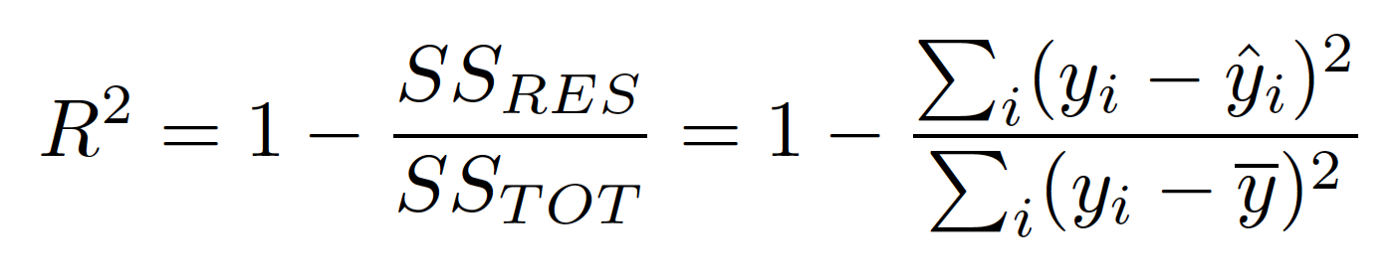

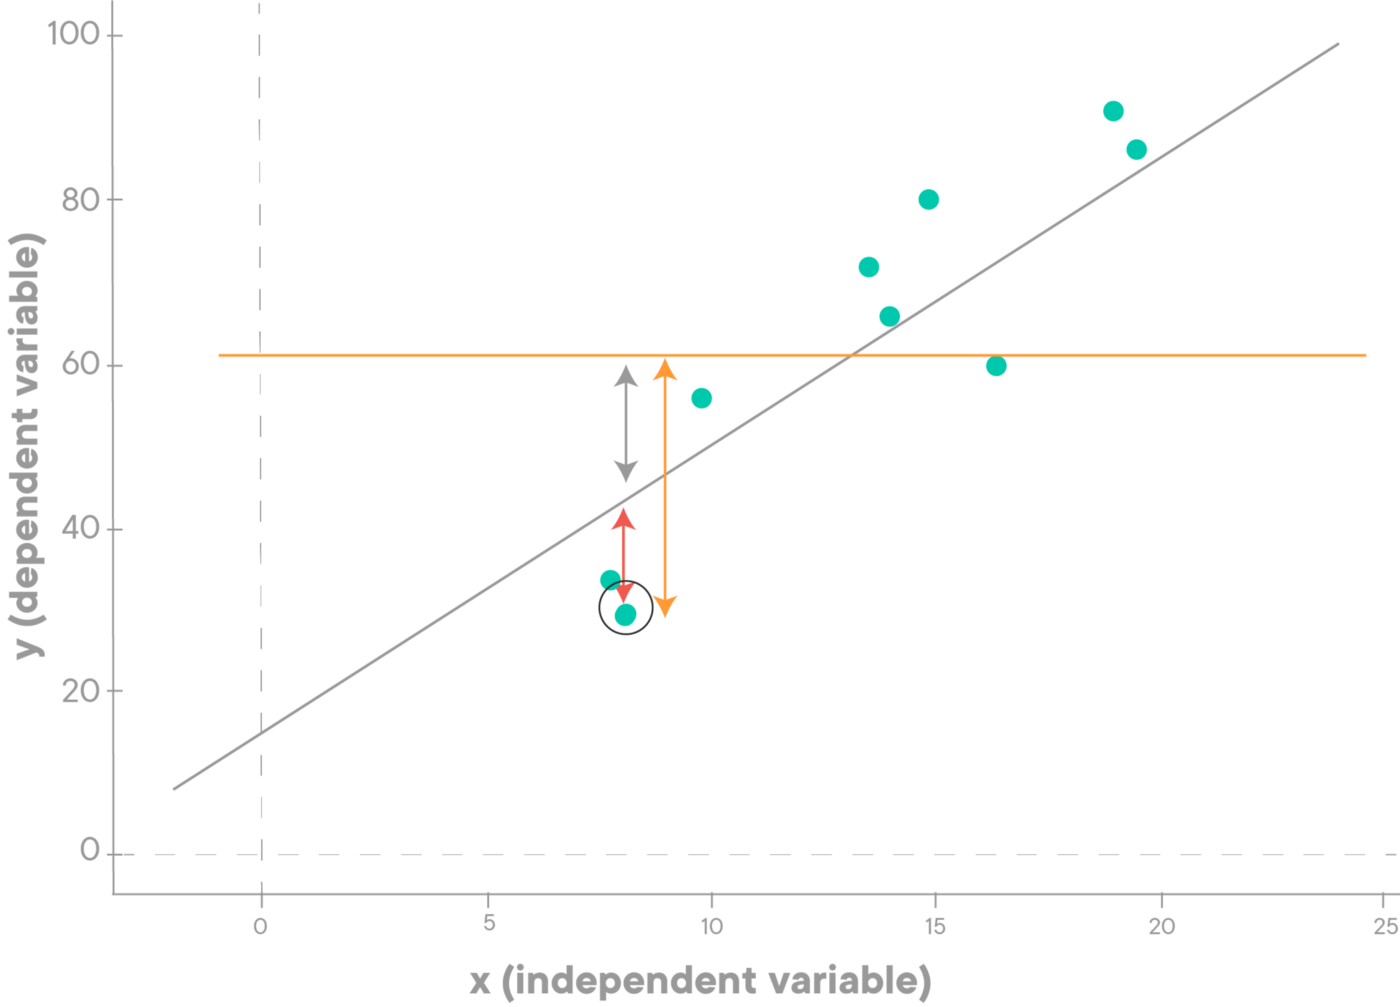

**Residual Sum of Squared Errors (RES) :** also known as SSE and RSS, is the sum of squared difference between y and predicted y (red arrow)

**Total Sum of Squared Errors (TOT):** also known as TSS, is the sum of squared difference between y and predicted y (orange arrow)

R-Squared can take a value between 0 and 1 where values closer to 0 represents a poor fit and values closer to 1 represent an (almost) perfect fit

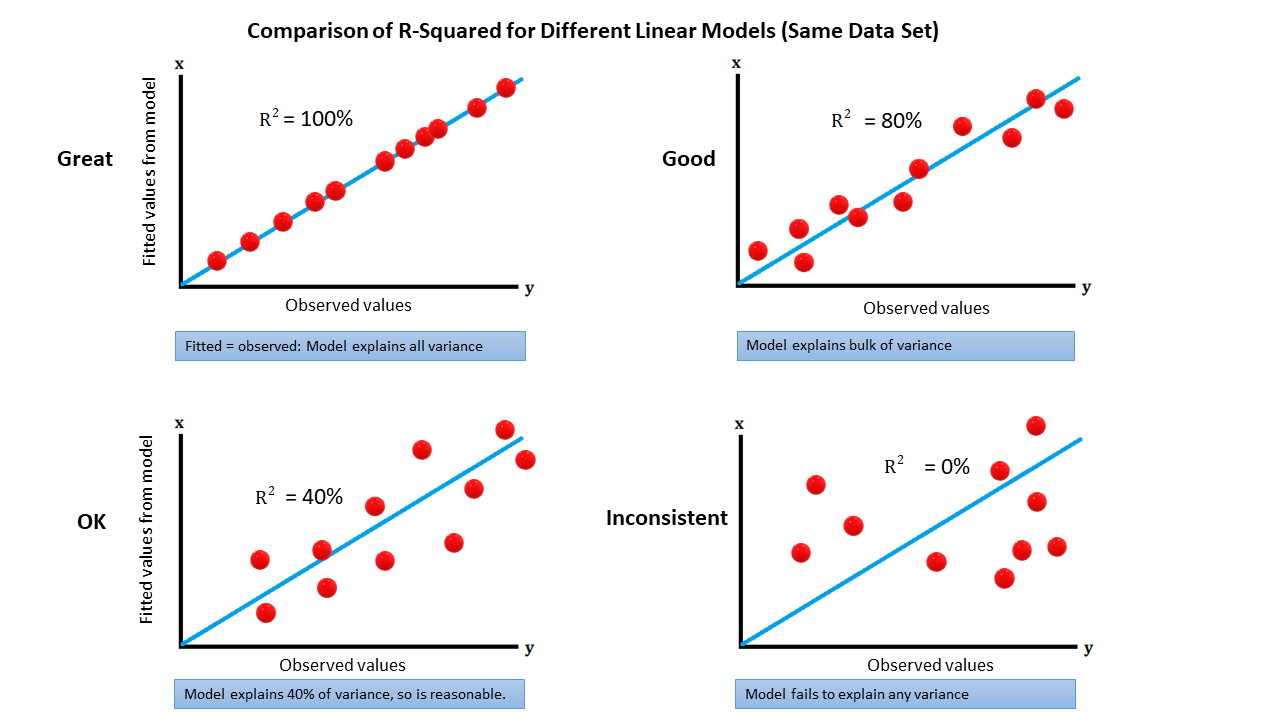

### **Assumptions of Linear Regression**
There are four assumptions associated with a linear regression model. If these assumptions are violated, it may lead to biased or misleading results.

**Linearity:** relationship between independent variable(s) and dependent variable is linear

* if not respected, regression will underfit and will not accurately model the relationship between independent and dependent variables
* if there is no linear relationship, various methods can be used to make the relationship linear such as polynomial and exponential transformations for both independent and dependent variables


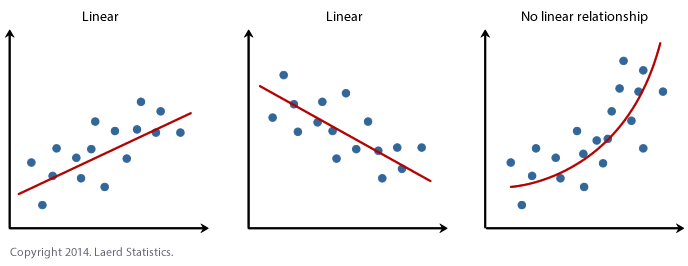

**Normality:** model residuals should follow a normal distribution

* if distribution is not normal, regression results will be biased and it may highlight that there are outliers or other assumptions being violated

* correct the large outliers in the data and verify if the other assumptions are not being violated

**Independence:** each independent variable should be independent from other independent variables

* multicollinearity is when independent variables are not independent from each other

* it indicates that changes in one predictor are associated with changes in another predictor

* Independent variables should not be perfectly correlated

**Homoscedasticity:** The error terms must have constant variance.

The variance of residual is the same for any value of x, fancy word for “equal variances”

* the model does not fit all parts of the model equally which lead to biased predictions

* it can be tackled by reviewing the predictors and providing additional independent variables (and maybe even check that the linearity assumption is respected as well)

There should be no correlation between the residual (error) terms. 

Use **Durbin Watson Test**

The error terms must be normally distributed

Mean of residual errors should be Zero.

Use **Jarque Bera test**

### **How can we validate our regression model results?**

 We use Train-Test Split to randomly split the data into two separate samples, sample for “training” the data and the other sample for “testing” the data. The general rule is to split the data into 70% training data and 30% testing data, but similar percentage splits can work as well.

To calculate the results for both train and test data, a popular metric is the Root Mean Squared Error (RMSE).

**Mean Squared Error (MSE):** average squared difference between the estimated values and the actual value

* the smaller the MSE, the closer the fit is to the data

**Root Mean Squared Error (RMSE):** square root of MSE

* easier to interpret since it is the same units as the quantity plotted on the x axis

* the RMSE is the distance on average of a data point from the fitted line, measured along a vertical line

In [ ]:
import pandas as pd

In [ ]:
import numpy as np


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv(r'https://query.data.world/s/qss6ecu3mgybc6erg7arhdawnkvkaw')

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
X=df[['cylinders', 'displacement', 'weight',
       'acceleration']]
X.shape

#[[]] used to define column vector

In [ ]:
X

In [ ]:
y=df['mpg']
y.shape
# [] used as row vector

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

# Library : sklearn, Module: model_selection, Function: train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=252)
# random seed fix to get a unique accuracy 
# train_size=0.7

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
lr.coef_ 

In [ ]:
lr.intercept_

In [ ]:
lr.score(X_train, y_train) # R square

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred.shape, y_test.shape

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

### **Ridge and Lasso regression**
 
Ridge and Laso regressiion are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

**Ridge Regression :** In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.

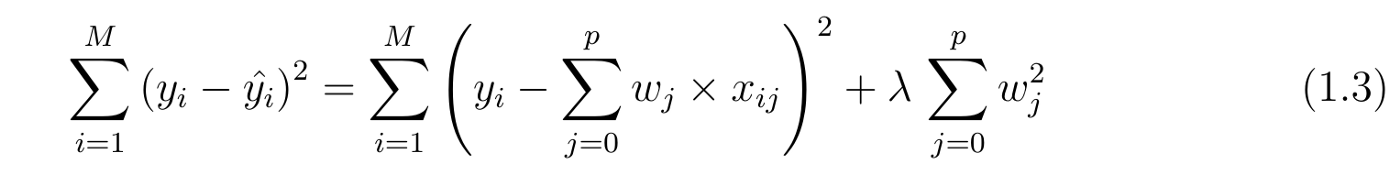

Ridge regression puts constraint on the coefficients (w). The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, **ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity**.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#print boston_df.info()
# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price']=boston.target
#print boston_df.head(3)
newX=boston_df.drop('Price',axis=1)
print(newX[0:3]) # check 
newY=boston_df['Price']
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization,
# in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

In X axis we plot the coefficient index and, for Boston data there are 13 features (for Python 0th index refers to 1st feature). 

* For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. 

* For higher value of α (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.

### **Lasso Regression**

**Lasso Regression :** The cost function for Lasso (least absolute shrinkage and selection operator) regression can be written as

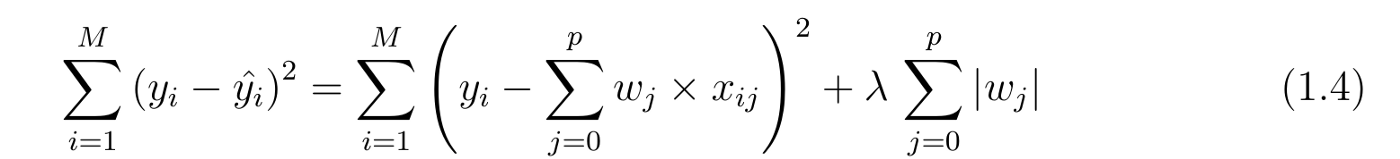

The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. **So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.**

### **Business Use Cases**

1. Linear regressions can be used in business to evaluate trends and make estimates or forecasts. 

2. Linear regression can also be used to analyze the marketing effectiveness, pricing and promotions on sales of a product.

3. In the credit card industry, a financial company maybe interested in minimizing the risk portfolio and wants to understand the top five factors that cause a customer to default. 

etc